In [1]:
! pip install astropy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.0/10.0 MB 12.6 MB/s eta 0:00:00m eta 0:00:01:01:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 738.7/738.7 KB 14.0 MB/s eta 0:00:00 MB/s eta 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 14.1 MB/s eta 0:00:0031m17.2 MB/s eta 0:00:01


        Use get_body("moon") instead. [warnings]


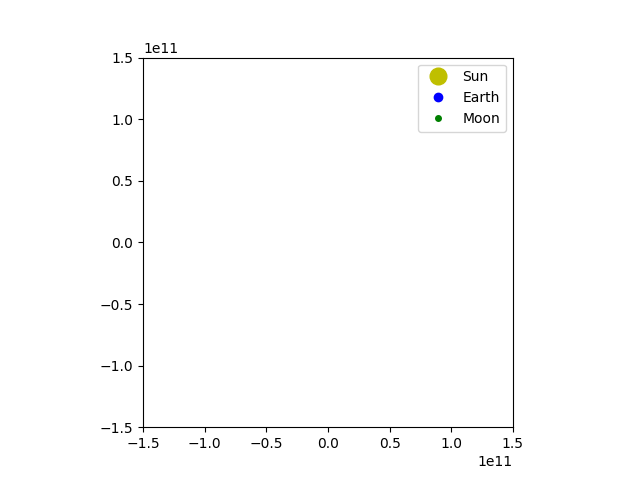

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from astropy.time import Time
from astropy.coordinates import get_sun, get_moon, EarthLocation
%matplotlib widget

# Define the location of the observer
location = EarthLocation.of_site('greenwich')

# Define the time range for the animation
time_start = Time('2024-06-18')
time_end = Time('2024-06-19')
time_range = time_start + (time_end - time_start) * np.linspace(0, 1, 100)

# Get the positions of the Sun and Moon
sun_positions = get_sun(time_range).cartesian
moon_positions = get_moon(time_range).cartesian

# Convert positions to arrays for plotting
sun_x = sun_positions.x.to_value()
sun_y = sun_positions.y.to_value()
moon_x = moon_positions.x.to_value()
moon_y = moon_positions.y.to_value()

# Setup the plot
fig, ax = plt.subplots()
ax.set_xlim(-1.5e11, 1.5e11)  # Arbitrary units for visualization
ax.set_ylim(-1.5e11, 1.5e11)
ax.set_aspect('equal')

# Create plot elements
sun, = ax.plot([], [], 'yo', markersize=12, label='Sun')
earth, = ax.plot([], [], 'bo', markersize=6, label='Earth')
moon, = ax.plot([], [], 'go', markersize=4, label='Moon')

# Initialize the animation
def init():
    sun.set_data([], [])
    earth.set_data([], [])
    moon.set_data([], [])
    return sun, earth, moon

# Update the animation
def update(frame):
    sun.set_data(sun_x[frame], sun_y[frame])
    earth.set_data(0, 0)  # Earth's position at the origin for simplicity
    moon.set_data(moon_x[frame], moon_y[frame])
    return sun, earth, moon

# Create the animation
ani = FuncAnimation(fig, update, frames=len(time_range),
                    init_func=init, blit=True)

# Display the animation
plt.legend()
plt.show()
